<a href="https://colab.research.google.com/github/IntroComputationalPhysics-UNT/pivot-point-driven-pendulum-dallen466/blob/main/Stability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Pseudocode for driven harmonic oscillator
 1. import modules: numpy, scipy.integrate for solve_ivp, matplotlib as plt, matplotlib.animate
 2. define equation of motion: pivot_driven_pendulum(t,y, omega_d, omega_0=1,x_p0 = 1, y_p0 = 1) where 't' and 'y' are time and state variables. omega_0 is the natrual freq, omega_d is the driving freq, γ is the damping coeffecient

    * equation of motion is:
$$\ddot{θ} + 2γ\dot{θ} + ω^{2}_{o} [1 + \frac{\ddot{y}}{g}]sin(θ)+ ω_{o}^{2}\frac{\ddot{x}}{g}cos(θ)= 0 $$
     
3. Utilities
    * paramaterize the pivot point with a funtion; get_pivot_pointxy(t, omega_d, x_p0, y_p0)
    * get pendulum_xy
    * get_lab_xy
    * basic_plot(t,y,xlabel, ylabel, figsize(3,3))
    *
4. solve eq of motion with 'radua' method
define intial condition with 'y_0' = [theta_0, ang_vel_0]    
    

In [76]:
#Import modules
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
g = 9.8
omega_d = 1 #driven frequency of pivot point
l = 1 #length of pendulum
t_min = 0
t_max = np.pi/omega_d #max of time span represents period maximum
t_span = (t_min, t_max)

In [86]:
#define function for pivot driven pendulum
"""

"""
def pivot_driven_pendulum(t,y, omega_d, omega_0=1,x_p0 = 1, y_p0 = 1):

  theta_0 = 0
  ang_vel_0 = 0
  y_0= [theta_0, ang_vel_0] # [theta, dottheta]

  theta_0 , ang_vel_0 = y #state variable
  gamma = 3 #damping factor
  #ddotx = -np.sin(theta_0) #second derivative of x direction of bob
  #ddoty = -np.cos(theta_0) #second derivative of y direction of bob
  ddotx_p = x_p0*omega_d**2*np.sin(omega_d*t) #second derivative of x direction of pivot point
  ddoty_p = -y_p0*omega_d**2*np.cos(omega_d*t) #second derivative of y direction of pivot point
  #
  ddtheta_dt = -2*gamma*ang_vel - omega_0**2 * (1 + ddoty) * np.sin(theta) - omega_0**2 * ddotx * np.cos(theta)


  return dydt



In [93]:
###Utilities

#basic plot
def basic_plot(t, y, xlabel=None, ylabel=None, figsize=(3,3)):
  plt.figure(figsize=figsize)
  plt.plot(t, y)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  return plt.show()

#function for pivot point position
def get_pivot_pointxy(t, omega_d, x_p0 = 1, y_p0 = 1):
  """

  """
  x_pivot = x_p0 * np.sin(omega_d * t)
  y_pivot = y_p0 * (np.cos(omega_d * t) - 1)
  return x_pivot, y_pivot


def get_lab_xy(t,omega_d, y_0, x_p0, y_p0, l):
  "Find position of pendulum bob"
  y_0 = [theta_0, ang_vel_0]
  sol = solve_ivp(pivot_driven_pendulum, t_span, y_0, args=( dtheta_dt, ddtheta_dt), method= 'Rauda', dense_output= True, t_eval=np.linspace(0,50,1) )

  return sol.y, sol.t

def get_pendulum_xy(t, theta):
  sol = solve_ivp(pivot_driven_pendulum, t_span, y_0, method= 'Rauda', args=(omega_d, gamma, omega_0, g, l, ))
  return sol.t[0] , sol.t[1]



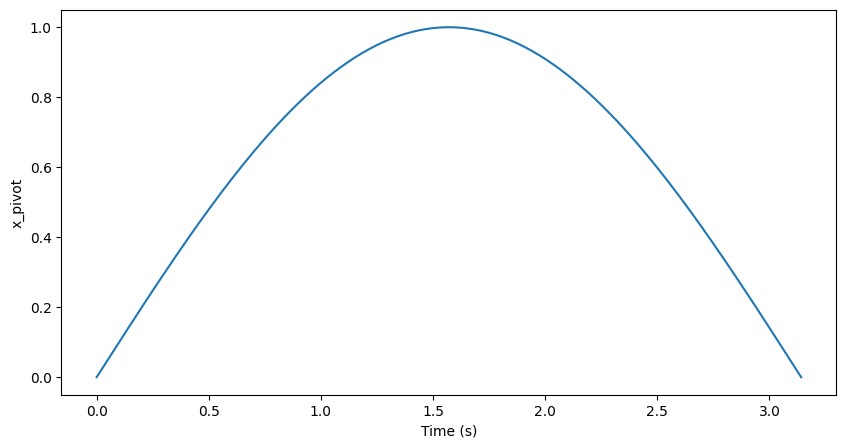

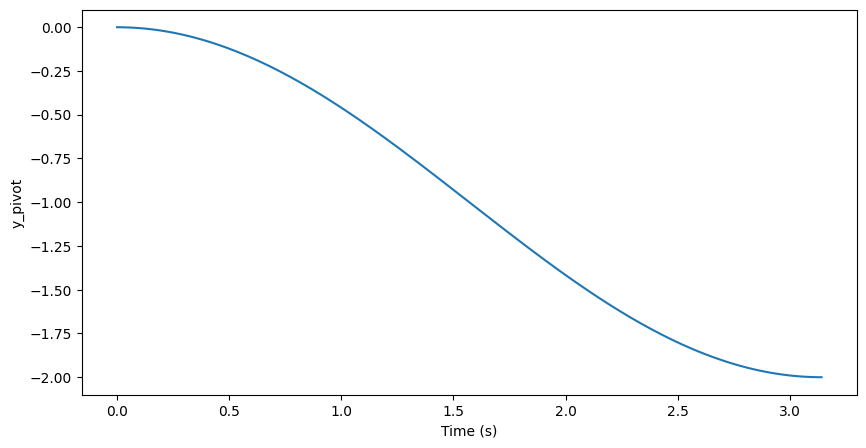

In [90]:
# Define parameters for pivot point motion
x_p0 = 1
y_p0 = 1
n_points = 200 # Number of points
t = np.linspace(t_min, t_max, n_points)

# Calculate pivot point positions
x_pivot, y_pivot = get_pivot_pointxy(t, omega_d, x_o, y_o)

# Plot x_pivot and y_pivot using basic_plot
basic_plot(t, x_pivot, xlabel='Time (s)', ylabel='x_pivot', figsize=(10, 5))
basic_plot(t, y_pivot, xlabel='Time (s)', ylabel='y_pivot', figsize=(10, 5))

In [83]:
# create pendulum animation
def create_pendulum_animation(t, x_pivot, y_pivot, x_lab, y_lab, l=1, show_traj=False, speed_factor=1.0):
    """
    Creates an animation of the pivot-driven pendulum.

    PARAMETERS:
    t : ndarray
        Time array.
    x_pivot : ndarray
        x-positions of the pivot over time.
    y_pivot : ndarray
        y-positions of the pivot over time.
    x_lab : ndarray
        x-positions of the pendulum bob in the lab frame over time.
    y_lab : ndarray
        y-positions of the pendulum bob in the lab frame over time.
    l : float, optional
        pendulum length (default is 1).
    show_traj : bool, optional
        toggle showing the trajectory of the pendulum bob (default is False).
    speed_factor : float, optional
        factor to scale the animation speed (default is 1.0).
        a value > 1.0 slows down the animation, < 1.0 speeds it up.

    RETURNS:
    anim : FuncAnimation
        matplotlib animation object.
    """
    fig, ax = plt.subplots(figsize=(4, 4)) # Increased figure size
    ax.set_xlim(np.min(x_pivot) - l, np.max(x_pivot) + l)
    ax.set_ylim(np.min(y_pivot) - l, np.max(y_pivot) + l)
    # ax.set_aspect('equal', adjustable='box')
    ax.set_aspect('equal')
    ax.set_xlabel('x')
    ax.set_ylabel('y')

    # Initialize plot elements
    pivot, = ax.plot([], [], 'o', color='black', markersize=8, label='Pivot')
    pendulum_arm, = ax.plot([], [], '-', color='black', lw=2, label='Pendulum Arm')
    pendulum_bob, = ax.plot([], [], 'o', color='red', markersize=12, label='Pendulum Bob')
    trajectory = None # Initialize trajectory to None

    if show_traj:
        trajectory, = ax.plot([], [], '-', color='gray', lw=1, alpha=0.5, label='Trajectory') # Add trajectory line

    def animate(i):
        # Update the positions of the plot elements
        pivot.set_data([x_pivot[i]], [y_pivot[i]]) # Pass as sequences
        pendulum_arm.set_data([x_pivot[i], x_lab[i]], [y_pivot[i], y_lab[i]])
        pendulum_bob.set_data([x_lab[i]], [y_lab[i]]) # Pass as sequences

        artists = [pivot, pendulum_arm, pendulum_bob] # List of artists to update

        if show_traj and trajectory:
             trajectory.set_data(x_lab[:i+1], y_lab[:i+1]) # Update trajectory data
             artists.append(trajectory) # Add trajectory to the list of artists

        return artists # Return all updated artists

    # Create the animation
    # Adjust the interval based on the average time step in t
    # This aims to make the animation speed consistent with the simulation time
    average_time_step = np.mean(np.diff(t))
    # Scale the interval by the speed_factor
    interval = average_time_step * 1000 * speed_factor # Convert to milliseconds and apply speed_factor.

    anim = FuncAnimation(fig, animate, frames=len(t), interval=interval, blit=True)
    plt.close(fig) # Close the initial figure to prevent it from displaying

    return anim

In [94]:
# animate motion
# plot pendulum angle versus time
# get coordinates for plotting
n_points = 300 # number of frames
t_plot = np.linspace(t_min, t_max, n_points)
theta_plot = sol.sol(t_plot)[0] # requires `dense_output=True` in `solve_ivp`
x_pivot, y_pivot = get_pivot_xy(t_plot, omega_d, x_p0, y_p0) # pivot coordinates
x_pendulum, y_pendulum = get_pendulum_xy(t_plot, theta_plot, l) # pendulum coordinates of pendulum (referenced to pivot point)
x_lab, y_lab = get_lab_xy(x_pivot, y_pivot, x_pendulum, y_pendulum) # pendulum coordinates in the lab frame

# animation flags/parameters
show_traj = True # True --> show trajectory; False --> do not show trajectory
speed_factor = 5 # >1 --> slow down animation; <1 --> speed up animation

# create_pendulum_animation
pendulum_animation = create_pendulum_animation(t_plot, x_pivot, y_pivot, x_lab, y_lab, show_traj=show_traj, speed_factor=speed_factor) # create animation object with trajectory shown
HTML(pendulum_animation.to_html5_video()) # display animation

NameError: name 'sol' is not defined